# Fraud loan predection analysis

#### Problem statement

In Finance field loan is a process of lending money by one or more person or any organization to other bodies or individuals or any organization who are in need of it.

There are various parameter on which the loan is been given by the banks or any other bodies.

Those parameters could be if the person is married or not or he has a good income and stabalized job so that he will be able to repay the loan on time.

Problem Statement of the dataset: We have been given the below data to analyse that "Whether to give loan to a person or not based on the information"

### Importing all necessary libraries

In [214]:
import numpy as np                   # for numerical calculations we import numpy
import pandas as pd                  # pandas provide flexible high level data structure and variety of tools 
import matplotlib.pyplot as plt      # Matplotlib is use for data visualization
import seaborn as sns                # seaborn is used for high level visualization

from sklearn.linear_model import LinearRegression   
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix ,accuracy_score,roc_curve,auc
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from scipy.stats import zscore
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
import joblib
import warnings
warnings.filterwarnings('ignore')

# Data

Data can be provided by the client or we can mine the data.

I had data in my local system in csv format, data can be in any format like excel, jason, html etc.


In [136]:
#Importing data from local file into the notebook 

In [137]:
df=pd.read_csv('loan_data.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [138]:
#checking shape of data
df.shape

(614, 13)

Interpretation: Here we have 614 rows and 13 coloumns

In [139]:
#head shows first five rows of the data:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [140]:
#tail shows last five rows of the data:
df.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [141]:
#Information required of the datasets:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [142]:
#types of the data:
df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

### Checking missing values

Now its important to check the missing value as no data should be missed.

<AxesSubplot:>

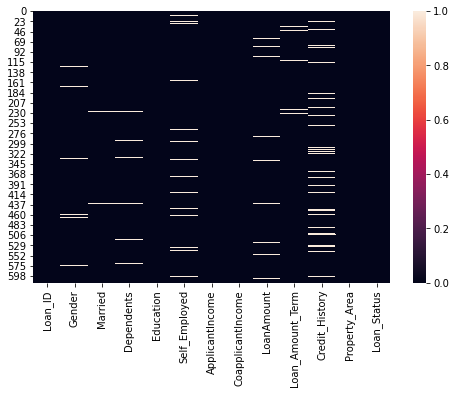

In [143]:
#by using visualization
plt.figure(figsize=(8,5))
sns.heatmap(df.isnull())

Interpretation:The above graph is here to show that if there are any null values in the above dataset
    
we have found that out that the black color shows the '0' value here, it means that none of the value is empty(Null Values).

Where as we can see some of the white lines in the heat map that shows the presence of nan values in the given data set.

We will be treating these values.

In order to get more clearity we have taken out the sum of the total Null Values down which is also giving us the same output that is , ' 0 '


In [144]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Sum of null values in particular columns

### Filling null value 

In [145]:
df["Gender"] = df["Gender"].fillna(df["Gender"].dropna().mode().values[0] )
df["Married"] = df["Married"].fillna(df["Married"].dropna().mode().values[0] )
df["Dependents"] = df["Dependents"].fillna(df["Dependents"].dropna().mode().values[0] )
df['Self_Employed']=df['Self_Employed'].fillna(df['Self_Employed'].dropna().mode().values[0])
df['LoanAmount']=df['LoanAmount'].fillna(df['LoanAmount'].dropna().median())
df["Loan_Amount_Term"] = df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].dropna().mode().values[0] )
df["Credit_History"] = df["Credit_History"].fillna(df["Credit_History"].dropna().mode().values[0] )

We have removed all the null values.

In [146]:
#checking for null value again
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

As You can see we have successfull removed the null values.

In [147]:
#Checking unique values in data.
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [148]:
df.Married.unique()

array(['No', 'Yes'], dtype=object)

In [149]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [150]:
# Describing the stats in data.
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,145.752443,342.410423,0.855049
std,6109.041673,2926.248369,84.107233,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,128.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Interpretation:There were missing values in the above data and we have treated also the same. we are reviewing here the count of each fields, mean , standard deviation minimum value and maximum value too , if we review the loan amount in the above data then we could see that the min loan amout is 9 where as max is 700.thus we could also see the mean and median values here.

# Data Visualization

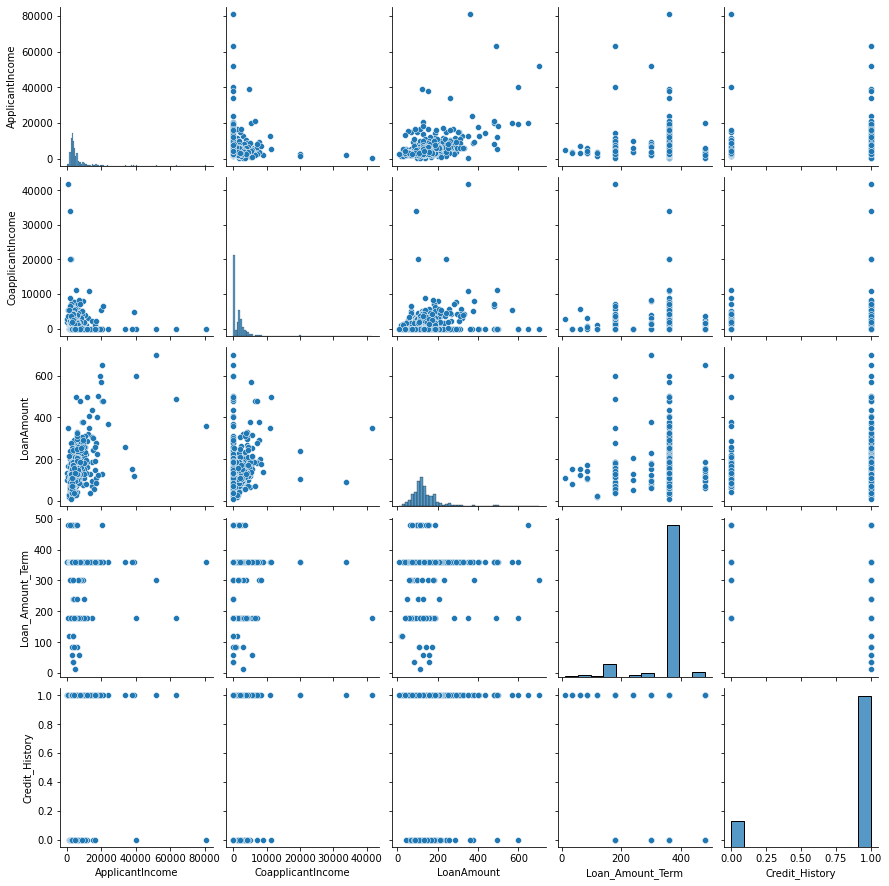

In [151]:
sns.pairplot(df)

Interpretations:Pairplot has been constucted above to show or allow us the see both the distribution of each variables and also to show the relationship between each of the two variables, "/" -->shows the positive corelation where as "\" -->shows negative corelation for some there are holizontal lines which shows neutral relationship with each other.

Through the above and below graph we have come accros to the attributes or the fields which are positively corelated or neutral corelated to each other, Hence we would be taking them in to the consideration.

These fields are : 'ApplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History'

These fields are some what showing neutral correlation with each other. The below graph shows is the stucture of corelation between each of the variables with respect to the heatmap.The black dots represent negative corelation where as off white color shows the positive corelation. There are field which are negative relationship, hence we will be removing 'CoapplicantIncome' .

We will remove this field before modeling our data.

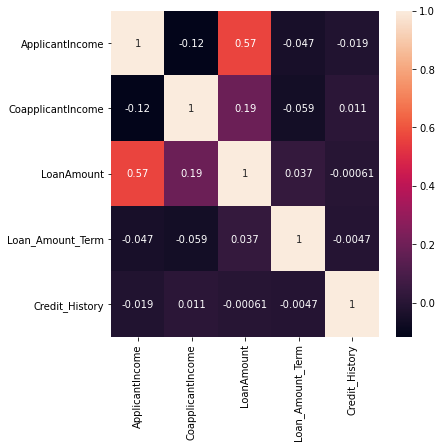

In [152]:
#checking correlation
corr_hmap=df.corr()
plt.figure(figsize=(6,6))
sns.heatmap(corr_hmap,annot=True)
plt.show()

array([[<AxesSubplot:title={'center':'ApplicantIncome'}>,
        <AxesSubplot:title={'center':'CoapplicantIncome'}>],
       [<AxesSubplot:title={'center':'LoanAmount'}>,
        <AxesSubplot:title={'center':'Loan_Amount_Term'}>],
       [<AxesSubplot:title={'center':'Credit_History'}>, <AxesSubplot:>]],
      dtype=object)

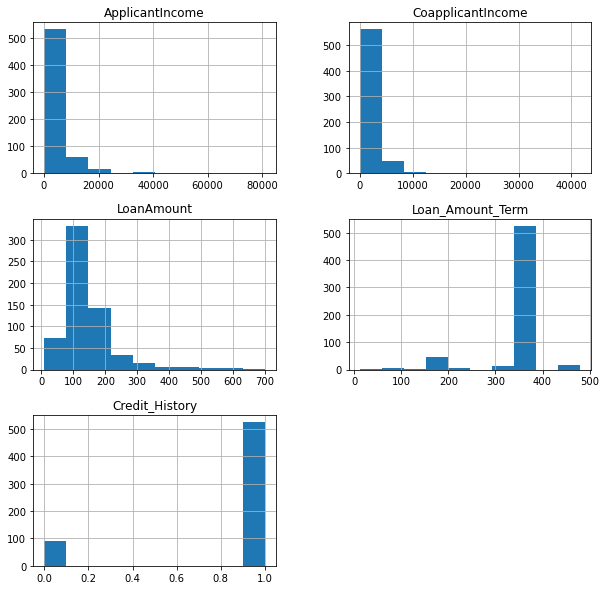

In [153]:
df.hist(figsize=(10,10))

'ApplicantIncome','CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History' Histogram is showing the count as well as the majority of the variables such as if the credit history is meeting the guideline or not then this shows that almost 90% is =1, most of the loan amount is ranging between 90 to 150.

<AxesSubplot:>

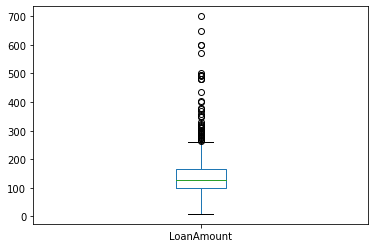

In [154]:
df['LoanAmount'].plot.box()

<AxesSubplot:>

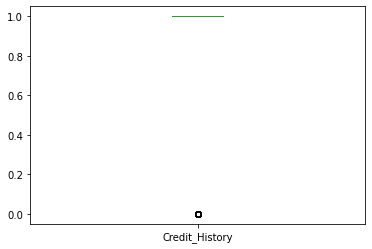

In [155]:
df['Credit_History'].plot.box()

<AxesSubplot:>

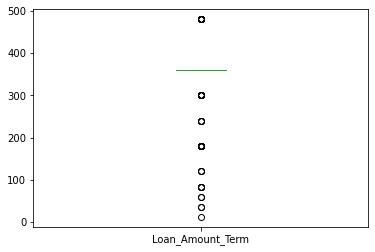

In [156]:
df['Loan_Amount_Term'].plot.box()

The plot box situated above are representing the minimum value , maximum value and showing the mean value for the variables. In some of the variables such as Loan amount, loan amount term , credit history.

The graph shows some poiters above or below the graph which is used to detect if there are any outliers presnt in the datasets or not. If the detection is accurate then we should be able to treat them in order to get the perfect outcome or result.

Outliers here are the observations that we find at the abnormal distance from other values.

In [157]:
#BIVARIENT ANALAYSIS

<AxesSubplot:xlabel='count', ylabel='Gender'>

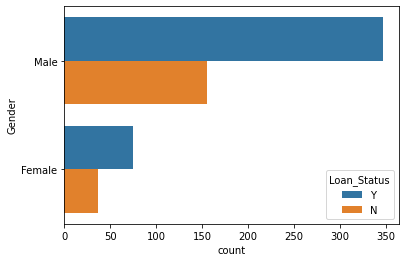

In [158]:
sns.countplot(y='Gender', hue='Loan_Status', data=df)

Interpretation: Male has more number of approval rates and count is 350
    where women approval rate is quite low

<AxesSubplot:xlabel='count', ylabel='Married'>

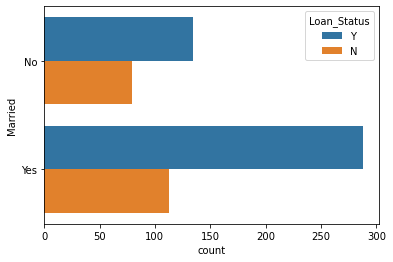

In [159]:
sns.countplot(y='Married', hue='Loan_Status', data=df)

Interpretation: Married couple has good amount of approval rate.

<AxesSubplot:xlabel='count', ylabel='Dependents'>

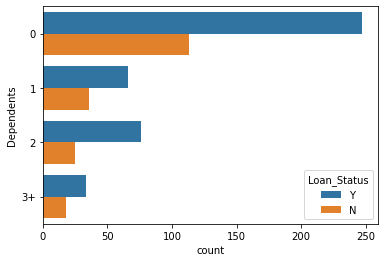

In [160]:
sns.countplot(y='Dependents', hue='Loan_Status', data=df)

Less the number of dependents more the approval rate.

<AxesSubplot:xlabel='count', ylabel='Education'>

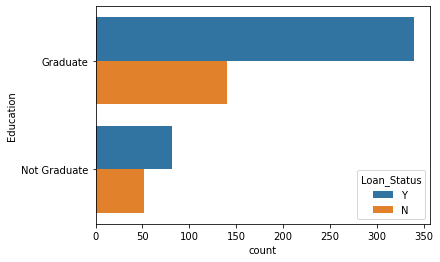

In [161]:
sns.countplot(y='Education', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

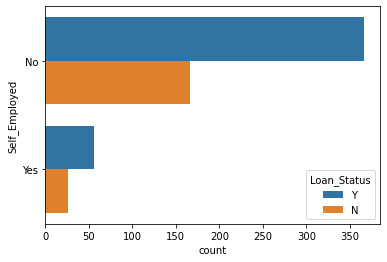

In [162]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data=df)

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

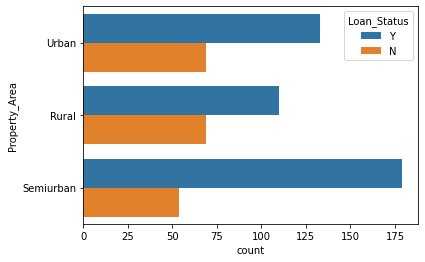

In [163]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=df)


# Label Encoder

In [164]:
from sklearn.preprocessing import LabelEncoder

categorical_features = list(df.select_dtypes(include=['object']).columns)
label_encoder_feat = {}
for i, feature in enumerate(categorical_features):
    label_encoder_feat[feature] = LabelEncoder()
    df[feature] = label_encoder_feat[feature].fit_transform(df[feature])

df.head()


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1


# Removing columns

In [165]:
#Removing loan id , which is of no use here in this data ...:
df.drop("Loan_ID", axis=1,inplace=True)

In [166]:
df.drop("CoapplicantIncome", axis=1,inplace=True)

Removing CoapplicantIncome column as we can see that this field is showing a negative relationship with other fields such as Applicants income , which may affect out data with the prediction.

In [167]:
df.shape

(614, 11)

# Removing Outliers

In [168]:
from scipy.stats import zscore
z_score=abs(zscore(df))
print(df.shape)

(614, 11)


In [169]:
df1=df.loc[(z_score<3).all(axis=1)]
print(df1.shape)

(582, 11)


After removing the outliers from the data the shape of the data has change from 614,13to 582, 11 shows that with the z score we are able to remove various rows , Hence our new data shape is (582,11)|

In [170]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,128.0,360.0,1.0,2,1
1,1,1,1,0,0,4583,128.0,360.0,1.0,0,0
2,1,1,0,0,1,3000,66.0,360.0,1.0,2,1
3,1,1,0,1,0,2583,120.0,360.0,1.0,2,1
4,1,0,0,0,0,6000,141.0,360.0,1.0,2,1


# Assigning X AND Y Variables

In [171]:
x=df1.iloc[:,:10]
x.shape

(582, 10)

In [172]:
x.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,128.0,360.0,1.0,2
1,1,1,1,0,0,4583,128.0,360.0,1.0,0
2,1,1,0,0,1,3000,66.0,360.0,1.0,2
3,1,1,0,1,0,2583,120.0,360.0,1.0,2
4,1,0,0,0,0,6000,141.0,360.0,1.0,2


In [173]:
x.shape

(582, 10)

In [174]:
y=df1.iloc[:,-1:]
y.shape

(582, 1)

In [175]:
y.head()

,Loan_Status
0,1
1,0
2,1
3,1
4,1


# Using Standard Scaler:


To bring all the values at the same scale(We can see that applicant income and. loan amount are scaled at different parameters, so we will bring all the vallues at the same scale.)

In [176]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler(copy=True, with_mean=True, with_std=True).fit(x)
df1_x_scaler = scaler.transform(x)

In [177]:
x = pd.DataFrame(df1_x_scaler)
x.head()

,0,1,2,3,4,5,6,7,8,9
0,0.477334,-1.356106,-0.725576,-0.538949,-0.381666,0.399209,-0.141393,0.233693,0.416398,1.221805
1,0.477334,0.737405,0.277477,-0.538949,-0.381666,-0.025464,-0.141393,0.233693,0.416398,-1.313277
2,0.477334,0.737405,-0.725576,-0.538949,2.620089,-0.556474,-1.220047,0.233693,0.416398,1.221805
3,0.477334,0.737405,-0.725576,1.855464,-0.381666,-0.696355,-0.280574,0.233693,0.416398,1.221805
4,0.477334,-1.356106,-0.725576,-0.538949,-0.381666,0.449861,0.084776,0.233693,0.416398,1.221805


# Training the data using train test split

In [178]:
from sklearn.model_selection import train_test_split

In [179]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=.20,random_state=42)

In [180]:
x_train.shape

(465, 10)

In [181]:
y_train.shape

(465, 1)

# MODEL SELECTION


Using different types of model in order to acquire optimum solution:

In [193]:
#regression model
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
r2_scr=r2_score(y_test,y_pred)
print("r2_score:",r2_scr)

r2_score: 0.29380546217300496


In [132]:
#As the output is in 0 and 1 i.e logistic regression can work more better.

In [185]:
L=LogisticRegression()
L.fit(x_train,y_train)
pred=L.predict(x_test)
r2=r2_score(y_test,y_pred)
AS= accuracy_score(y_test,pred)
print('ACCURACY SCORE IS = ',AS)
print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
cm=confusion_matrix(y_test,pred)
print('CONFUSION MATRIX',cm)

ACCURACY SCORE IS =  0.8034188034188035
CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.39      0.57        38
           1       0.77      1.00      0.87        79

    accuracy                           0.80       117
   macro avg       0.89      0.70      0.72       117
weighted avg       0.85      0.80      0.77       117

CONFUSION MATRIX [[15 23]
 [ 0 79]]


In [186]:
GNB=GaussianNB()
SVC=SVC()
DTC=DecisionTreeClassifier(random_state=10)
KNN=KNeighborsClassifier()

In [188]:
models= []
models.append(('GaussianNB',GNB))
models.append(('SVC',SVC))
models.append(('DecisionTreeClassifier',DTC))
models.append(('KNeighborsClassifie',KNN))

**************** GaussianNB ****************


GaussianNB()


ACCURACY SCORE IS =  0.8034188034188035


CROSS_VAL_SCORE =  0.8092928112215079


ROC_AUC_SCORE =  0.6973684210526316


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.39      0.57        38
           1       0.77      1.00      0.87        79

    accuracy                           0.80       117
   macro avg       0.89      0.70      0.72       117
weighted avg       0.85      0.80      0.77       117



CONFUSION MATRIX [[15 23]
 [ 0 79]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


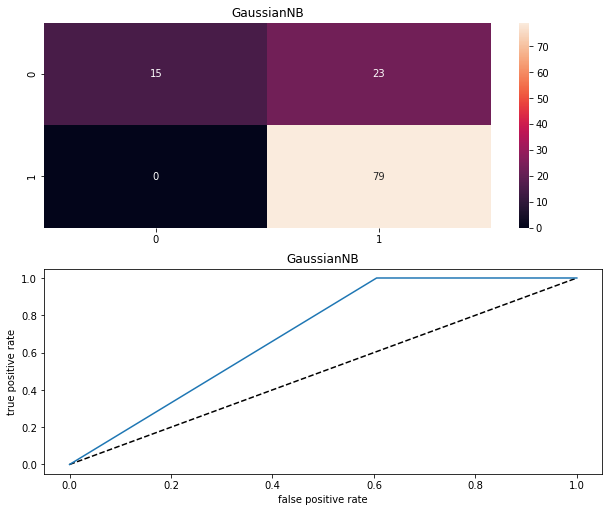




**************** SVC ****************


SVC()


ACCURACY SCORE IS =  0.8034188034188035


CROSS_VAL_SCORE =  0.8109877264757452


ROC_AUC_SCORE =  0.6973684210526316


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       1.00      0.39      0.57        38
           1       0.77      1.00      0.87        79

    accuracy                           0.80       117
   macro avg       0.89      0.70      0.72       117
weighted avg       0.85      0.80      0.77       117



CONFUSION MATRIX [[15 23]
 [ 0 79]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


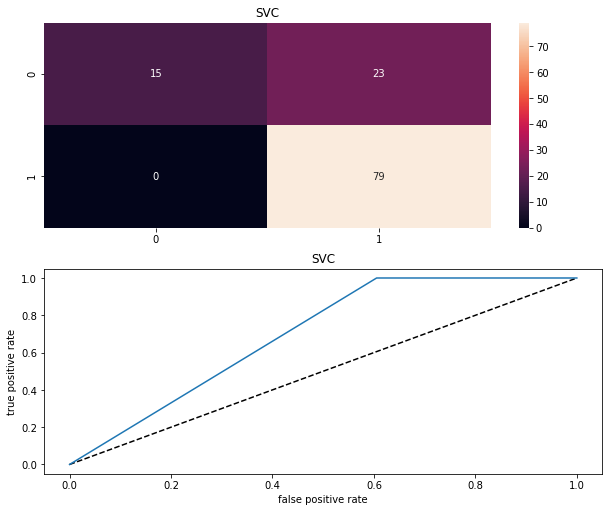




**************** DecisionTreeClassifier ****************


DecisionTreeClassifier(random_state=10)


ACCURACY SCORE IS =  0.7008547008547008


CROSS_VAL_SCORE =  0.7165692577440093


ROC_AUC_SCORE =  0.6692205196535643


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.54      0.58      0.56        38
           1       0.79      0.76      0.77        79

    accuracy                           0.70       117
   macro avg       0.66      0.67      0.67       117
weighted avg       0.71      0.70      0.70       117



CONFUSION MATRIX [[22 16]
 [19 60]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


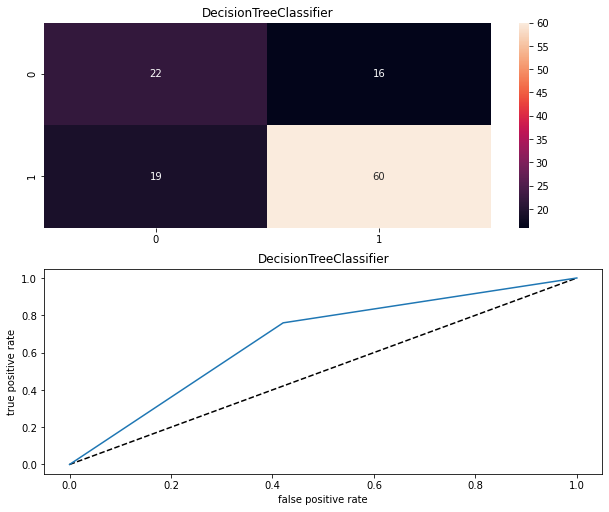




**************** KNeighborsClassifie ****************


KNeighborsClassifier()


ACCURACY SCORE IS =  0.7777777777777778


CROSS_VAL_SCORE =  0.7782875511396844


ROC_AUC_SCORE =  0.6715522984676882


CLASSIFICATION REPORT =                precision    recall  f1-score   support

           0       0.88      0.37      0.52        38
           1       0.76      0.97      0.86        79

    accuracy                           0.78       117
   macro avg       0.82      0.67      0.69       117
weighted avg       0.80      0.78      0.75       117



CONFUSION MATRIX [[14 24]
 [ 2 77]]


AxesSubplot(0.125,0.808774;0.62x0.0712264)


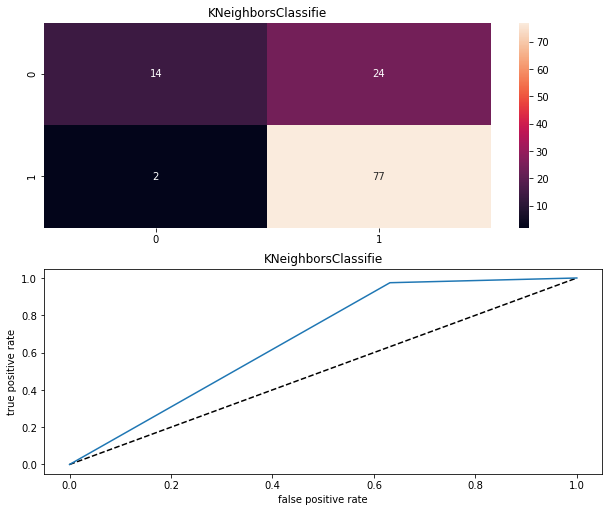

In [208]:
Model = []
score = []
cvs = []
rocscore = []
for name,model in models:
    print('****************',name,'****************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    AS= accuracy_score(y_test,pred)
    print('ACCURACY SCORE IS = ',AS)
    score.append(AS*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='accuracy').mean()
    print('CROSS_VAL_SCORE = ',sc)
    cvs.append(sc*100)
    print('\n')
    false_positive_rate,true_positive_rate,thresholds=roc_curve(y_test,pred)
    roc_auc= auc(false_positive_rate,true_positive_rate)
    print('ROC_AUC_SCORE = ',roc_auc)
    rocscore.append(roc_auc*100)
    print('\n')
    print('CLASSIFICATION REPORT = ',classification_report(y_test,pred))
    print('\n')
    cm=confusion_matrix(y_test,pred)
    print('CONFUSION MATRIX',cm)
    print('\n')
    plt.figure(figsize=(10,40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm,annot=True))
    plt.subplot(912)
    plt.title(name)
    plt.plot([0,1],[0,1],'k--')
    plt.plot(false_positive_rate,true_positive_rate,label='AUC= %.2f'% roc_auc)
    plt.xlabel('false positive rate')
    plt.ylabel('true positive rate')
    plt.title(name)
    plt.show()
    print('\n\n')

In [210]:
result=pd.DataFrame({'Model': Model,'Accuracy_score': score,'Cross_val_score': cvs,'Roc_auc_curve': rocscore})
result

,Model,Accuracy_score,Cross_val_score,Roc_auc_curve
0,GaussianNB,80.341880,80.929281,69.736842
1,SVC,80.341880,81.098773,69.736842
2,DecisionTreeClassifier,70.085470,71.656926,66.922052
3,KNeighborsClassifie,77.777778,77.828755,67.155230


# Saving the model

In [216]:
#Dumping the data
joblib.dump(L,'Project_Loan_Prediction_Analysis.obj')

['Project_Loan_Prediction_Analysis.obj']

In [217]:
#loading back the model:
model=joblib.load('Project_Loan_Prediction_Analysis.obj')

Predict the data

In [227]:
#Pridicting x_test Logistic Regressor = L
lor=L.predict(x_test)

In [228]:
lor

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1])